Ngày nay với sự bùng nổ của internet nên lượng dữ liệu cực kì lớn, các công ty thiết kế đồ họa có những bước tiến vượt bậc, khả năng tính toán của GPU mạnh mẽ hơn rất nhiều ==> deep learning lên ngôi, mạng neural networks đặc biệt là các mạng CNN với các kiến trúc như VGG16, ResNet, ... đã 1 phần tiễn đưa rất nhiều thuật toán xử lí ảnh trong computer vision về vườn như SIFT, HOG, ...

Giới thiệu về các thuật toán xử lí ảnh mà không giới thiệu Neural network thật là thiếu sót.

Chúng ta sẽ xây dựng mạng neural network truyền thống để nhận dạng chữ số viết tay từ 0 đến 9 trên tập dữ liệu MNIST

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# load bộ dataset mnist
mnist = tf.keras.datasets.mnist


In [3]:
# chia dataset thành 2 tập train và test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize lại tính toán cho dễ
x_train, x_test = x_train / 255.0, x_test / 255.0

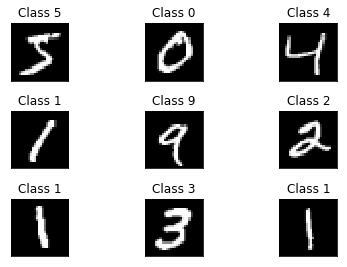

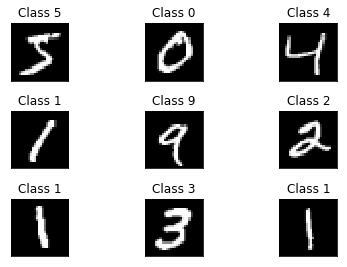

In [7]:
# xem một vài bức ảnh trong tập train và nhãn tương ứng của chúng
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0].shape)
print(y_train[0].shape)

(60000, 28, 28)
(60000,)
(28, 28)
()


In [4]:
# xây dựng mô hình mạng neural network để rút trích đặc trưng và phân lớp
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # duỗi ảnh đầu vào (vector hóa)
  tf.keras.layers.Dense(128, activation='relu'), # hàm kích hoạt relu
  tf.keras.layers.Dropout(0.2), # thêm tý Dropout khắc phục đạo hàm bị mất mát
  tf.keras.layers.Dense(10, activation='softmax') # lớp cuối cùng để phân lớp
])
# compile mô hình
model.compile(optimizer='adam', # tối ưu dùng adam, 1 dạng của gradient descent
              loss='sparse_categorical_crossentropy', # hàm loss sẽ dùng 1 loại dựa trên entropy chéo
              metrics=['accuracy']) # đánh giá mô hình bằng accuracy

In [11]:
# huấn luyện mô hình 
his = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2)


Epoch 1/5
1875/1875 - 4s - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0731 - val_accuracy: 0.9767
Epoch 2/5
1875/1875 - 4s - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0719 - val_accuracy: 0.9803
Epoch 3/5
1875/1875 - 4s - loss: 0.0530 - accuracy: 0.9829 - val_loss: 0.0667 - val_accuracy: 0.9794
Epoch 4/5
1875/1875 - 4s - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.0710 - val_accuracy: 0.9799
Epoch 5/5
1875/1875 - 4s - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0756 - val_accuracy: 0.9795


<p>Có thể thấy độ chính xác trên test set (tập dữ liệu kiểm thử) là cực kì cao.
Cao hơn rất nhiều nếu ta sử dụng các thuật toán xử lí ảnh thông thường.
Lí do tại sao? Do sử dụng mạng neural chúng ta sẽ cần 1 lượng dữ liệu khổng lồ để cho mạng học. Nếu như trong Machine learning hay xử lí ảnh truyền thống ta phải có 1 bước trích rút đặc trưng quan trọng rồi bắt đầu học thì ở đây chúng ta không làm thế. Mạng neural sẽ học các trọng số, càng nhiều dữ liệu nó càng học được càng nhiều. Khả năng regularization nó của nó càng tăng, độ chính xác càng cao và với dữ liệu mới nó có khả năng phân lớp chính xác cực cao. </p>
"Deep learning is the super power" - Prof Andrew Ng